# Hypothesis:
Higher age individuals with signs abnormal values in heart disease related features will be more likely to have heart disease (Ex. if they exhibit some form of chest pain or have abnormal ECG readings) than those who have completely normal readings

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
df = pd.read_csv('../data/heart.csv')

In [4]:
df.shape

(918, 12)

In [5]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## Quick description of what each column is representing:
Age: Patients age in years
***
Sex: Male or female sex of patient
***
Chest Pain Type: 4 different values used here
* TA: Typical Angina
** Example happens when running, during exercise
* ATA: Atypical Angina
** Will randomly get the pain, higher cause for concern since its happening when not stressing
* NAP: Non-Anginal Pain
* ASY: Asymptomatic
***
Resting BP: Resting blood pressure of patient (measured in mmHG)
***
Cholesterol: Serum cholesterol of pateint (measured in mm/dl (milligrams per deciliter))
***
Fasting BS: Fasting blood sugar of patient, represented in a binary 1 or 0 where 1 represents > 120 mg/dl and 0 is anything under
***
Resting ECG: Resting electrocardiogram of patient, 3 different values used here
* Normal: normal ECG reading
* ST: ST-T wave abnormality, presence of T wave inversions and/or ST elevation/depression of 0.05 mV
** ST elevation --> heart attack, ST elevation means "STEMI" essentially immediate care necessary
** ST depression --> ischemia, no electricity going through that area since its dead hence the depression
* LVH: showing signs of left veintricler hypertrophy by Estes' criteria
** heart failure
***
Max HR: maximum heart rate shown by patient
***
Exercise Angina: Binary yes or no of exercise induced angina
***
Old peak: This is equal to ST depression value
* Higher value here is worse
***
ST Slope: Represents the slope of peak exercise ST segment, three different values used here
* Up: upslope
* Flat: flat slope
* Down: downslope
***
**(Note: old peak and ST slope are both measures read from ECG)**
***
Heart Disease: Binary 1 or 0, 1 representing heart disease 0 representing no heart disease

### EDA

In [6]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [7]:
#no null values in dataset
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [8]:
#Although there are no null values, you can see that resting BP and cholesterol have min values of 0
#This isnt possible in reality, and as such are essentially like "null" values
#Cholesterol values of 0 are also skewing the description statistics of the column
#Should replace any 0 values with null instead

In [9]:
#only 1 null resting blood pressure value
df[df['RestingBP']==0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1


In [10]:
#172 cholesterol values are null
df[df['Cholesterol']==0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
293,65,M,ASY,115,0,0,Normal,93,Y,0.0,Flat,1
294,32,M,TA,95,0,1,Normal,127,N,0.7,Up,1
295,61,M,ASY,105,0,1,Normal,110,Y,1.5,Up,1
296,50,M,ASY,145,0,1,Normal,139,Y,0.7,Flat,1
297,57,M,ASY,110,0,1,ST,131,Y,1.4,Up,1
...,...,...,...,...,...,...,...,...,...,...,...,...
514,43,M,ASY,122,0,0,Normal,120,N,0.5,Up,1
515,63,M,NAP,130,0,1,ST,160,N,3.0,Flat,0
518,48,M,NAP,102,0,1,ST,110,Y,1.0,Down,1
535,56,M,ASY,130,0,0,LVH,122,Y,1.0,Flat,1


In [11]:
#18.7% of the total dataset has null cholesterol values...
df[df['Cholesterol']==0].shape[0]/df.shape[0]

0.18736383442265794

In [12]:
#replacing zeros with null
df['RestingBP'] = df['RestingBP'].replace(0, np.nan)
df['Cholesterol'] = df['Cholesterol'].replace(0, np.nan)

In [13]:
df.isnull().sum()

Age                 0
Sex                 0
ChestPainType       0
RestingBP           1
Cholesterol       172
FastingBS           0
RestingECG          0
MaxHR               0
ExerciseAngina      0
Oldpeak             0
ST_Slope            0
HeartDisease        0
dtype: int64

In [14]:
#checking balance of outcomes in heart disease
df['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [15]:
#cholesterol description statistics are looking more realistic now
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,917.000000,746.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.540894,244.635389,0.233115,136.809368,0.887364,0.553377
std,9.432617,17.999749,59.153524,0.423046,25.460334,1.066570,0.497414
min,28.000000,80.000000,85.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,207.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,237.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,275.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [16]:
#Lets test my hypothesis a bit...

In [17]:
df.groupby('HeartDisease').mean()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
HeartDisease,,,,,,
0,50.551220,130.180488,238.769231,0.107317,148.151220,0.408049
1,55.899606,134.449704,251.061798,0.334646,127.655512,1.274213


In [18]:
#Higher values in all numerical columns excluding max heart rate for those with heart disease

In [20]:
df.groupby(['HeartDisease','Sex']).mean()

Age   RestingBP  Cholesterol  FastingBS       MaxHR  \
HeartDisease Sex                                                              
0            F    51.202797  128.790210   249.183099   0.069930  149.048951   
             M    50.202247  130.925094   232.806452   0.127341  147.670412   
1            F    56.180000  142.000000   279.175000   0.320000  137.820000   
             M    55.868996  133.623632   247.503165   0.336245  126.545852   

                   Oldpeak  
HeartDisease Sex            
0            F    0.435664  
             M    0.393258  
1            F    1.336000  
             M    1.267467

In [34]:
#create a seperate dataframe for heart disease and not
pos_hd = df[df['HeartDisease']==1]
neg_hd = df[df['HeartDisease']==0]

In [52]:
print('For those with heart disease:',pos_hd.value_counts('ST_Slope'))
print('For those without heart disease:',neg_hd.value_counts('ST_Slope'))

For those with heart disease: ST_Slope
Flat    381
Up       78
Down     49
dtype: int64
For those without heart disease: ST_Slope
Up      317
Flat     79
Down     14
dtype: int64


In [59]:
print('Proportion of Flat slope in those with heart disease:', pos_hd.value_counts('ST_Slope').values[0]/len(pos_hd))
print('Proportion of Up slope in those with heart disease:', pos_hd.value_counts('ST_Slope').values[1]/len(pos_hd))
print('Proportion of Down slope in those with heart disease:', pos_hd.value_counts('ST_Slope').values[2]/len(pos_hd))

Proportion of Flat slope in those with heart disease: 0.75
Proportion of Up slope in those with heart disease: 0.15354330708661418
Proportion of Down slope in those with heart disease: 0.09645669291338582


In [60]:
print('Proportion of Flat slope in those with heart disease:', neg_hd.value_counts('ST_Slope').values[1]/len(pos_hd))
print('Proportion of Up slope in those with heart disease:', neg_hd.value_counts('ST_Slope').values[0]/len(pos_hd))
print('Proportion of Down slope in those with heart disease:', neg_hd.value_counts('ST_Slope').values[2]/len(pos_hd))

Proportion of Flat slope in those with heart disease: 0.15551181102362205
Proportion of Up slope in those with heart disease: 0.6240157480314961
Proportion of Down slope in those with heart disease: 0.027559055118110236


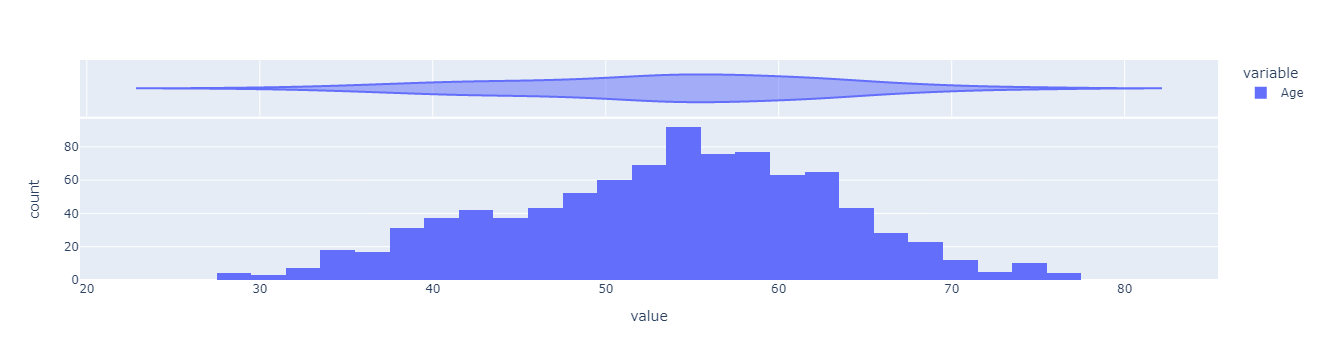

In [65]:
#age distributions
fig = px.histogram(df['Age'],marginal="violin")
fig.show()

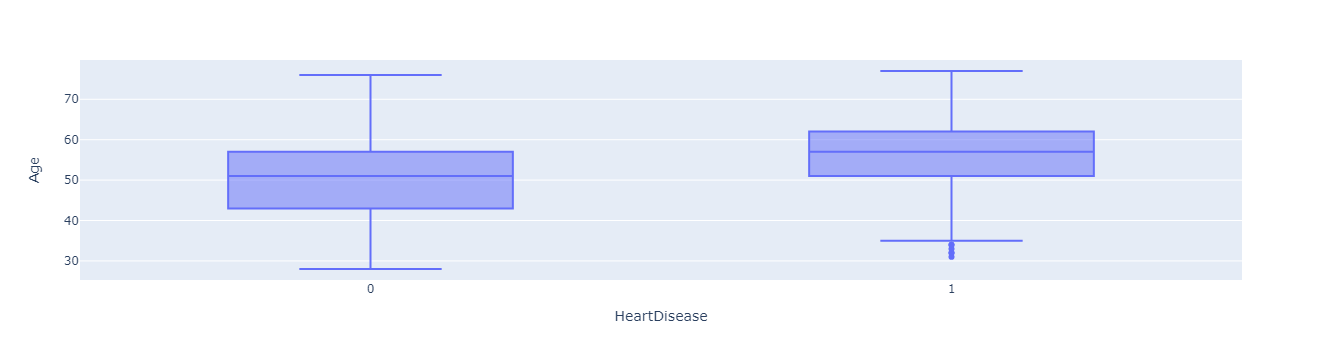

In [66]:
#Higher age in all quartiles, median, max and min for positive heart disease (some outliers in positive)
fig = px.box(df, y="Age", x="HeartDisease")
fig.show()